# Conway's Reverse Game of Life 
1. Each board contains 400 cells (20x20)
2. Given start board and end board
3. Target = start board
4. id = each game
5. delta = steps between start state to end state

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Read Training Data - Mine is store in Data folder within my code folder

In [ ]:
train = pd.read_csv('../Data/train.csv')

### Separate Target (Y) and Feature (X) Set
Each should have 400 columns denoting cells of the board per game

In [ ]:
X = train[[col for col in train.columns if "stop" in col]]
X

In [ ]:
Y = train[[col for col in train.columns if "start" in col]]
Y

### Get 80-20 percent test-train split

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

## Create Basic Multi Output Regressor using LogisticRegression Estimators

In [ ]:
# Create and train the multi-target regression model (LogisticRegression)
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LogisticRegression
multioutput_model = MultiOutputRegressor(
    LogisticRegression(random_state=100), n_jobs=-1)
multioutput_model.fit(X_train, y_train)

In [ ]:
# Make Predictions
multioutput_pred = multioutput_model.predict(X_test)

In [ ]:
# Calculate performance metrics for multioutput model
from sklearn.metrics import mean_squared_error, mean_absolute_error
multioutput_mse = mean_squared_error(y_test, multioutput_pred)
multioutput_mae = mean_absolute_error(y_test, multioutput_pred)

In [ ]:
# Print the performance metrics
print("Multioutput Model - Mean Squared Error:", multioutput_mse)
print("Multioutput Model - Mean Absolute Error:", multioutput_mae)

### Check for Bias - Test on train data

In [ ]:
multioutput_model_all = MultiOutputRegressor(
    LogisticRegression(random_state=100), n_jobs=-1)
multioutput_model_all.fit(X, Y)

In [ ]:
multioutput_pred_bias = multioutput_model_all.predict(X_test)

In [ ]:
multioutput_mse_bias = mean_squared_error(y_test, multioutput_pred_bias)
multioutput_mae_bias = mean_absolute_error(y_test, multioutput_pred_bias)

In [ ]:
# Print the performance metrics
print("Multioutput Model - Mean Squared Error:", multioutput_mse_bias)
print("Multioutput Model - Mean Absolute Error:", multioutput_mae_bias)

The model is behaving same with self trained data and unseen data with little reduced error while predicting on own data

## Create Basic Decision Tree For Multiple Classification

In [ ]:
# Create and train the decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

In [ ]:
# Make predictions
tree_pred = tree_model.predict(X_test)

In [ ]:
# Calculate performance metrics for decision tree model
tree_mse = mean_squared_error(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)

In [ ]:
print("Decision Tree Model - Mean Squared Error:", tree_mse)
print("Decision Tree Model - Mean Absolute Error:", tree_mae)

### Check for Bias - Test on train data

In [ ]:
tree_model_all = DecisionTreeClassifier(random_state=42)
tree_model_all.fit(X, Y)

In [ ]:
# Make predictions
tree_pred_bias = tree_model_all.predict(X_test)

In [ ]:
# Calculate performance metrics for decision tree model
tree_mse_bias = mean_squared_error(y_test, tree_pred_bias)
tree_mae_bias = mean_absolute_error(y_test, tree_pred_bias)
print("Decision Tree Model - Mean Squared Error (Trained on Full Data):", tree_mse_bias)
print("Decision Tree Model - Mean Absolute Error (Trained on Full Data):", tree_mae_bias)

This clearly is a low bias - high variance model. Heavily over fitted. Performs very good with seen data and terribly on new data. 

## Create Basic Decision Tree For Multiple Classification

In [ ]:
# Create and train the random forest regressor model
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

In [ ]:
# Make predictions
forest_pred = forest_model.predict(X_test)

In [ ]:
# Calculate performance metrics for random forest model
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)

In [ ]:
print("Random Forest Model - Mean Squared Error:", forest_mse)
print("Random Forest Model - Mean Absolute Error:", forest_mae)

### Check for Bias - Test on train data

In [ ]:
forest_model_all = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model_all.fit(X, Y)

In [ ]:
# Make predictions
forest_pred_bias = forest_model_all.predict(X_test)

In [ ]:
# Calculate performance metrics for random forest model
forest_mse_bias = mean_squared_error(y_test, forest_pred_bias)
forest_mae_bias = mean_absolute_error(y_test, forest_pred_bias)

print("Random Forest Model - Mean Squared Error: (Trained on full data)", forest_mse_bias)
print("Random Forest Model - Mean Absolute Error: (Trained on full data)", forest_mae_bias)

This is also a low bias - high variance model and Overfitted. Performs very good with seen data and not so good with unseen data. However, performance on unseen data is better than Logistic Regression Model

## Create Prediction of Test Data For Kaggle Upload

In [ ]:
# Read Test Set
Test = pd.read_csv('../Data/Test.csv')

In [ ]:
Test.shape

In [ ]:
x = Test[[col for col in Test.columns if "stop" in col]]
x

In [ ]:
# Column Config
col = ['id']
col.extend(list(Y.columns))

### Generate Predictions Using Logistic Regression

In [ ]:
multioutput_pred_bias = multioutput_model_all.predict(x)

In [ ]:
multioutput_pred_df = pd.DataFrame(multioutput_pred_bias,columns=Y.columns)
multioutput_pred_df.shape

In [ ]:
multioutput_pred_df['id'] = Test['id']

In [ ]:
multioutput_pred_df = multioutput_pred_df[col]

In [ ]:
multioutput_pred_df.to_csv('../Pred/LR_Basic_Pred_V1.csv',index=False)

### Generate Predictions Using Decision Tree

In [ ]:
# Make predictions
tree_pred_bias = tree_model_all.predict(x)

In [ ]:
tree_pred_df = pd.DataFrame(tree_pred_bias,columns=Y.columns)
tree_pred_df.shape

In [ ]:
tree_pred_df['id'] = Test['id']

In [ ]:
tree_pred_df = tree_pred_df[col]

In [ ]:
tree_pred_df.to_csv('../Pred/DT_Basic_Pred_V1.csv',index=False)

### Generate Predictions Using Random Forest

In [ ]:
forest_pred = forest_model_all.predict(x)

In [ ]:
forest_pred_df = pd.DataFrame(forest_pred,columns=Y.columns)
forest_pred_df.shape

In [ ]:
forest_pred_df['id'] = Test['id']

In [ ]:
forest_pred_df = forest_pred_df[col]

In [ ]:
forest_pred_df.to_csv('../Pred/RF_Basic_Pred_V1.csv',index=False)

### Kaggle Results 

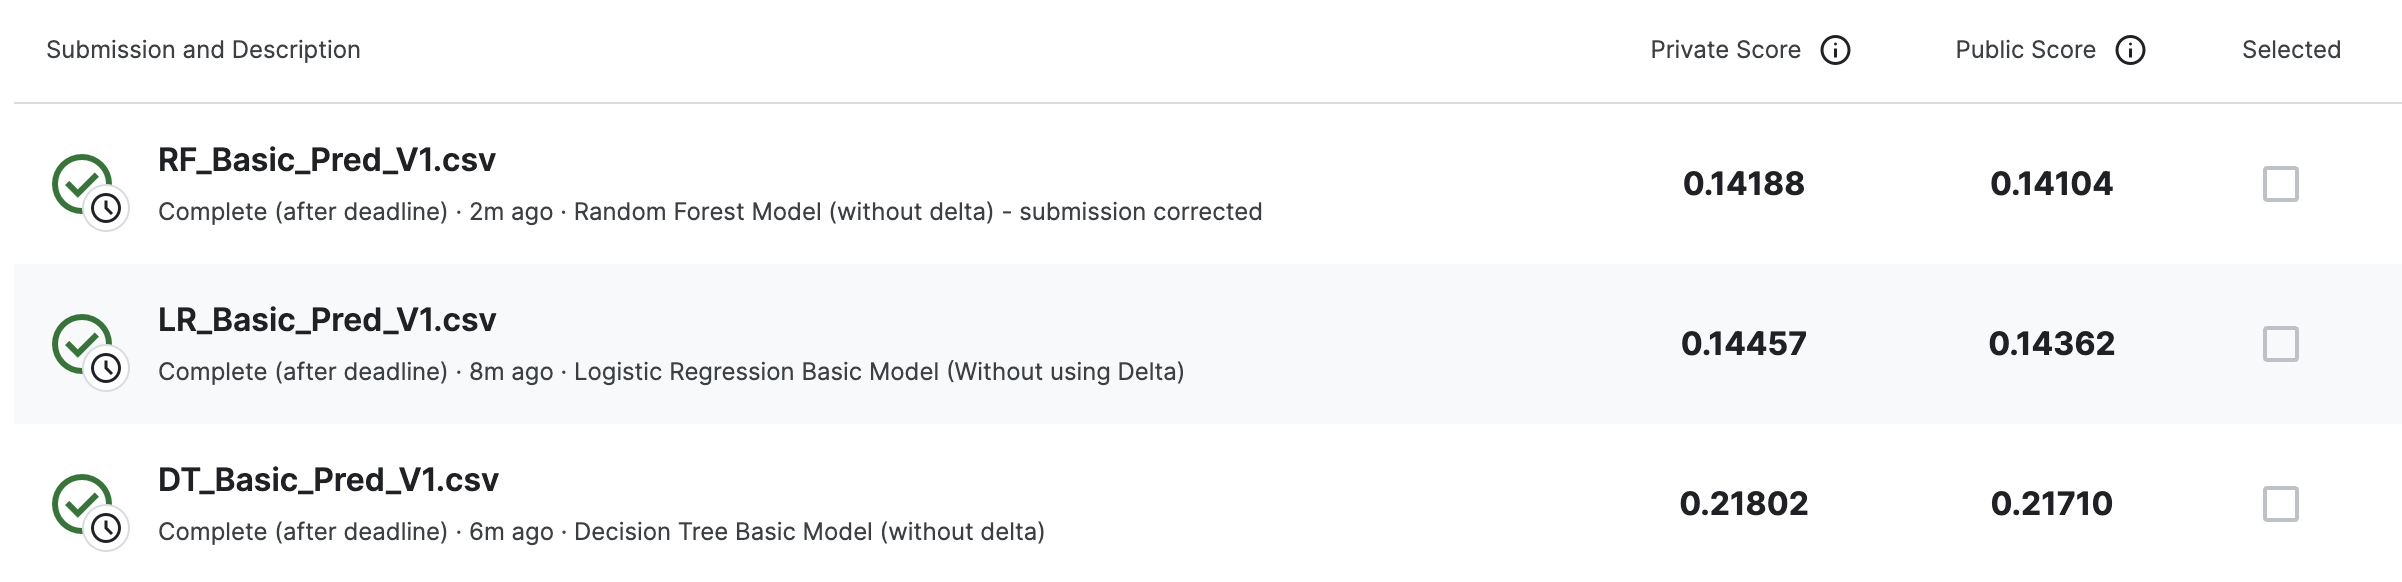

Our Basic Random Forest model and Logistic Regression model did good job with Start state prediction with Mean Absolute Error (mae) of 0.14. The current highest MAE is 0.10 using CNN